In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

**7. In the lab, we applied random forests to the Boston data using mtry=6
and using ntree=25 and ntree=500 . Create a plot displaying the test
error resulting from random forests on this data set for a more com-
prehensive range of values for mtry and ntree . You can model your
plot after Figure 8.10. Describe the results obtained.**

In [3]:
Boston = pd.read_csv("data/Boston.csv")
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
from sklearn.model_selection import train_test_split
columns = '1'
for column in Boston.columns:
    columns = columns + '+' + column
np.random.seed(1)
train_set, test_set = train_test_split(Boston, test_size = 0.5, random_state = 1)
y_test,X_test = patsy.dmatrices('medv ~ {} - medv'.format(columns), test_set, return_type = 'dataframe')
y_train,X_train = patsy.dmatrices('medv ~ {} - medv'.format(columns), train_set, return_type = 'dataframe')

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
trees_num_range = np.arange(1,501)
original_test_mse = []
divided_test_mse = []
sqrt_test_mse = []
for trees_num in trees_num_range:
    original_rf_reg =  RandomForestRegressor(n_estimators=trees_num,random_state=1,max_features = len(X_train.columns))
    divided_rf_reg = RandomForestRegressor(n_estimators=trees_num,random_state=1,max_features = 0.5)
    sqrt_rf_reg =  RandomForestRegressor(n_estimators=trees_num,random_state=1,max_features = 'sqrt')
    original_rf_reg.fit(X_train,y_train.values.ravel())
    divided_rf_reg.fit(X_train,y_train.values.ravel())
    sqrt_rf_reg.fit(X_train,y_train.values.ravel())
    original_test_mse.append(mean_squared_error(y_test,original_rf_reg.predict(X_test)))
    divided_test_mse.append(mean_squared_error(y_test,divided_rf_reg.predict(X_test)))
    sqrt_test_mse.append(mean_squared_error(y_test,sqrt_rf_reg.predict(X_test)))

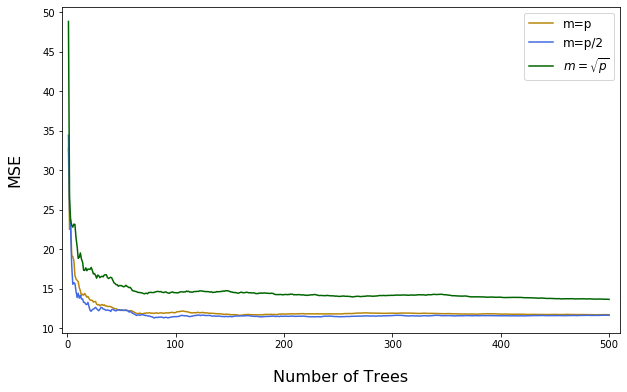

In [6]:
plt.figure(figsize=(10,6))
plt.plot(trees_num_range,original_test_mse,color = 'darkgoldenrod',label = 'm=p')
plt.plot(trees_num_range,divided_test_mse,color = 'royalblue',label = 'm=p/2')
plt.plot(trees_num_range,sqrt_test_mse,color = 'darkgreen',label = r'$m = \sqrt{p}$')
plt.xlim(-5,510)
plt.legend(fontsize = 12)
plt.xlabel('Number of Trees', fontsize = 16,labelpad =20)
plt.ylabel('MSE', fontsize = 16,labelpad =20)
plt.show()

单颗树的MSE较高，超过40，随着数数量增加到50以上，逐渐降到15以下，其中全部特征值及取p/2数量的略好于sqrt(p)情况

In [7]:
pd.DataFrame(divided_test_mse).idxmin()

0    72
dtype: int64

In [8]:
divided_test_mse[72]

11.164943559626392

72个树时，MSE最小为11